# House Prices: Advanced Linear Regression Technique

The goal is to predict the sales price for each house in the test data. For each Id in the test set, you must predict the value of the SalePrice variable. 

In [319]:
import pandas as pd

In [320]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

## Data Visualization

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [322]:
train_data = train_data.drop(columns=["Id"])
test_data = test_data.drop(columns=["Id"])

In [323]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [324]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Since we are trying to predict house prices, we look at the SalePrice variable in depth.

In [325]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

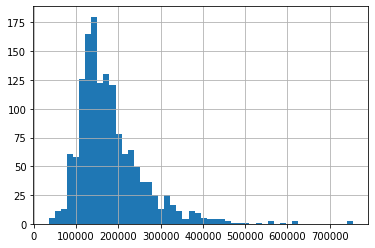

In [326]:
train_data['SalePrice'].hist(bins=50)
plt.show()

From the quantiles and the histogram, we can see that the distribution of *SalePrice* doesn't follow the normal distribution and is heavily right skewed.

To get a more detailed description of the relationship between *SalePrice* and the other variable, we examine the correlation.

In [327]:
corr_matrix = train_data.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


From the correlation, see that *OverallQual*, *GrLivArea*, *GarageCars*, *GarageArea*, *TotalBsmtSF*, and *1stFlrSF* show correlation greater than 0.6. For each variable we plot a graph to see the relationship between the variables.

### Categorical Variable

Since *OverallQual* is a categorical variable, we plot a boxplot for *SalePrice* against *OverallQual*

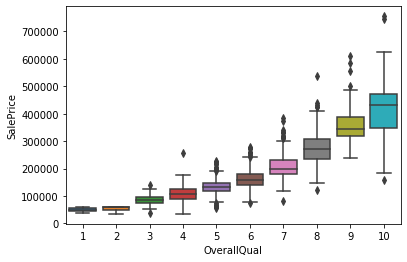

In [328]:
sns.boxplot('OverallQual', 'SalePrice', data = train_data)

### Numerical Variable

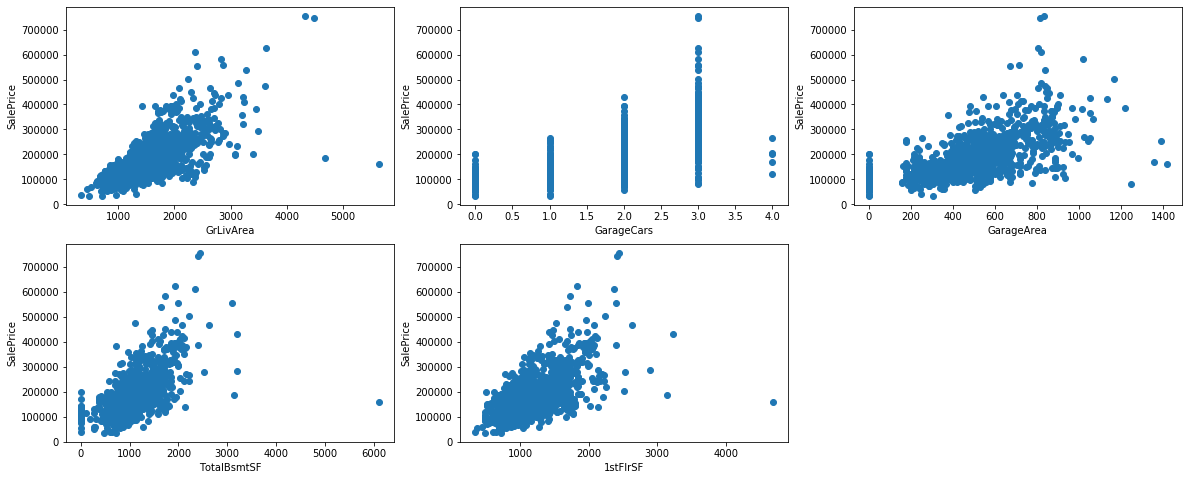

In [329]:
attributes = ['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

plt.figure(figsize = (20, 8))
for i in range(len(attributes)):
    plt.subplot(2, 3, i+1)
    plt.scatter(train_data[attributes[i]], train_data['SalePrice'])
    plt.xlabel(attributes[i])
    plt.ylabel('SalePrice')
plt.show()

From the scatter plots, *GrLivArea* and *1stFirSF* seems to be a better indicator as the *SalePrice* would be very low if these variables are also very low. From *GarageCars*, *GarageArea*, *TotalBsmtSF* we can see that *SalePrice* is not very low even if the variables are equal to 0.

## Preparing the Data

We print the 10 variables that has the highest correlation with `SalePrice`.

In [390]:
corr_matrix = train_data.corr()
top_10_highest = corr_matrix["SalePrice"].sort_values(ascending=False)[1:11]
print(top_10_highest)

OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
Name: SalePrice, dtype: float64


In [391]:
print(type(top_10_highest))

<class 'pandas.core.series.Series'>


We check if any of these columns have missing entries.

In [392]:
train_data_10 = train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                           'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]

missing_entry_num = train_data_10.isnull().sum().sort_values(ascending=False)
missing_entry_num.head(10)

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
dtype: int64

The output shows the columns do not have any missing row. For analysis, the columns of the data was broken down into three parts

- Numerical column
- Categorical column processed through OrdinalEncode
- Categorical column processed through OneHotEncoder

From the column descriptions, we can seperate the data as follows:

### Numerical Column

In [394]:
housing_num = ["GrLivArea", 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']

### Categorical Column

In [395]:
# columns used for OneHotEncoder()
one_hot_cat = ['YearBuilt', 'YearRemodAdd']

# columns used for OrdinalEncoder()
ordinal_cat = ['OverallQual']

### Transformation Pipeline

In [396]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [397]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [399]:
target = ["SalePrice"]

full_pipeline = ColumnTransformer([
    ("num_column", num_pipeline, housing_num),
    ("one_hot_column", OneHotEncoder(), one_hot_cat),
    ("ord_column", OrdinalEncoder(), ordinal_cat),
    ("sale_price", "passthrough", target)
])

In [400]:
housing_prepared = full_pipeline.fit_transform(train_data)

# Selecting and Training Model

In [402]:
# change sparse matrix (housing_prepared) into dataframe
transformed_train = pd.DataFrame.sparse.from_spmatrix(housing_prepared)
transformed_train.head()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,0.370055,0.311842,0.350660,-0.460570,-0.794191,0.790180,0.912128,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,208500.0
1,-0.482514,0.311842,-0.060947,0.465629,0.256426,0.790180,-0.318380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,181500.0
2,0.514687,0.311842,0.631301,-0.314568,-0.628576,0.790180,-0.318380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,223500.0
3,0.383376,1.650010,0.790331,-0.688698,-0.522480,-1.025367,0.296874,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,140000.0
4,1.298746,1.650010,1.697737,0.198720,-0.046338,0.790180,1.527382,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,250000.0


In [403]:
# shuffle the data
shuffle_train = transformed_train.sample(frac=1).reset_index(drop=True)
shuffle_train.head()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,0.773503,1.650010,0.949361,1.971273,1.964326,0.790180,0.912128,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,377426.0
1,0.370055,0.311842,0.350660,-0.460570,-0.794191,0.790180,0.912128,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,208500.0
2,0.352927,0.311842,0.645333,0.757633,1.392438,0.790180,-0.318380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,171000.0
3,-1.118134,-1.026327,-1.033835,-0.296318,-0.607875,-1.025367,-1.548889,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,132000.0
4,-0.882156,0.311842,-0.154494,-0.109253,-0.286996,-1.025367,-0.318380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,155000.0


We split the data into training data and validation data. 

In [404]:
# 181 in column for SalePrice in shuffle_train
X_train = shuffle_train.loc[:, shuffle_train.columns != 181][:312]
y_train = shuffle_train[181][:312]

X_valid = shuffle_train.loc[:, shuffle_train.columns != 181][312:]
y_valid = shuffle_train[181][312:]

In [416]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA

We use dimension reduction to make the dataset smaller.

In [406]:
pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)

n_components = len(pca.explained_variance_ratio_)

X_valid_reduced = PCA(n_components=n_components).fit_transform(X_valid)

In [414]:
def cross_val(algo, predictor = X_train_reduced, label = y_train, X_valid = X_valid_reduced, y_valid = y_valid):
    model = algo
    fitted_model = model.fit(predictor, label)
    predicted_value = fitted_model.predict(X_valid)
    log_predicted_value = np.log(predicted_value+1)
    log_y_valid = np.log(y_valid+1)
    score = mean_squared_error(log_y_valid, log_predicted_value)
    return np.sqrt(score)

In [417]:
print("Linear Regression", cross_val(LinearRegression()))
print("Lasso", cross_val(Lasso()))
print("Ridge", cross_val(Ridge()))
print("Random Forest", cross_val(RandomForestRegressor()))
print("Support Vector Machine", cross_val(LinearSVR()))
print("AdaBoostRegressor", cross_val(AdaBoostRegressor()))
print("GBR", cross_val(GradientBoostingRegressor()))

Linear Regression 0.24338877465592984
Lasso 0.24336495866708066
Ridge 0.24321053713154156
Random Forest 0.20430443486035338
Support Vector Machine 6.290729196832536
AdaBoostRegressor 0.2134710036962623
GBR 0.21495258539546488


From the root mean squared values printed above, we can see that the Random Forest model returns the smallest value. 

## Fine-Tuning the Model

In [419]:
from sklearn.model_selection import GridSearchCV

We use GridSearchCV to find the best possible set of parameters that returns the smallest error.

In [420]:
param_grid = [
    {'n_estimators': [50, 100, 500, 1000], 'max_leaf_nodes': [8, 16, 32], 'bootstrap': [True, False]}
]

rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_log_error',
                          return_train_score=True)

grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [421]:
# get params that return best result
grid_search.best_params_

{'bootstrap': True, 'max_leaf_nodes': 32, 'n_estimators': 1000}

In [423]:
predict = grid_search.best_estimator_.predict(X_valid_reduced)

def log_rmse(predict, true = y_valid):
    """
    get root mean squared error of log(predict) and log(true)
    """
    mse = mean_squared_error(np.log(y_valid+1), np.log(predict+1))
    return np.sqrt(mse)

print("Log RMSE:", log_rmse(predict))

Log RMSE: 0.20474633706024342


Since the best parameters were values that was the maximum for `max_leaf_nodes` and `n_estimators` we check further to see if there are better parameters.

In [425]:
param_grid = [
    {'n_estimators': [1000, 1500], 'max_leaf_nodes': [32, 64]}
]

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_log_error',
                          return_train_score=True)

grid_search.fit(X_train_reduced, y_train)

print("grid_search:", grid_search.best_params_)

grid_search: {'max_leaf_nodes': 64, 'n_estimators': 1500}


In [427]:
print('log rmse:', log_rmse(predict))

log rmse: 0.20474633706024342


We see that increase the parameters decrease the value of log rmse. The original Random Forest Regressor had a log rmse value of 0.2043, whereas the log rmse of the most recent grid search model is 0.2047.

We fit the Random Forest Regressor to predict sale prices for the test dataset.

In [434]:
rfr_test = RandomForestRegressor()
model = rfr_test.fit(X_train_reduced, y_train)

## Predicting using test data

In [428]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [431]:
test_pipeline = ColumnTransformer([
    ("num_column", num_pipeline, housing_num),
    ("one_hot_column", OneHotEncoder(), one_hot_cat),
    ("ord_column", OrdinalEncoder(), ordinal_cat),
])

In [432]:
pipeline_test = test_pipeline.fit_transform(test_data)
transformed_test = pd.DataFrame.sparse.from_spmatrix(pipeline_test)
transformed_test.head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,-1.215588,-0.988189,1.185921,-0.370716,-0.654561,-1.028720,-0.918335,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,-0.323539,-0.988189,-0.741235,0.639230,0.433298,-1.028720,-0.255371,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.294508,0.301406,0.042537,-0.266784,-0.574165,0.773083,-0.255371,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.243004,0.301406,-0.012788,-0.271303,-0.579190,0.773083,0.407593,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,-0.424487,0.301406,0.153187,0.528520,0.310192,0.773083,-0.918335,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [433]:
test_reduced = PCA(n_components=n_components).fit_transform(transformed_test)

In [435]:
pred_sale_price = model.predict(test_reduced)

In [437]:
# import new test data to get the Id column
test_data_id = pd.read_csv('data/test.csv')

In [439]:
sale_price_df = pd.DataFrame({"Id": test_data_id["Id"], 'SalePrice': pred_sale_price})
sale_price_df.head()

,Id,SalePrice
0,1461,141885.50
1,1462,160522.76
2,1463,156454.45
3,1464,173609.06
4,1465,233784.11


In [442]:
# check if length same as submission
print(len(sale_price_df))

1459


In [441]:
sale_price_df.to_csv('sale_price_df.csv', index=False)